<a href="https://colab.research.google.com/github/tech4ap/reducing-commercial-aviation-fatalities/blob/master/DSC530_AJAYPATHAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib as plt
import pandas as pd
import warnings # For warning handling

## Data source: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv
loan_data = pd.read_csv("/content/loan-prediction-data-test.csv")
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


As a part of univariant analysis let's set gender and marital status as categorical variables and perform correlation analysis.

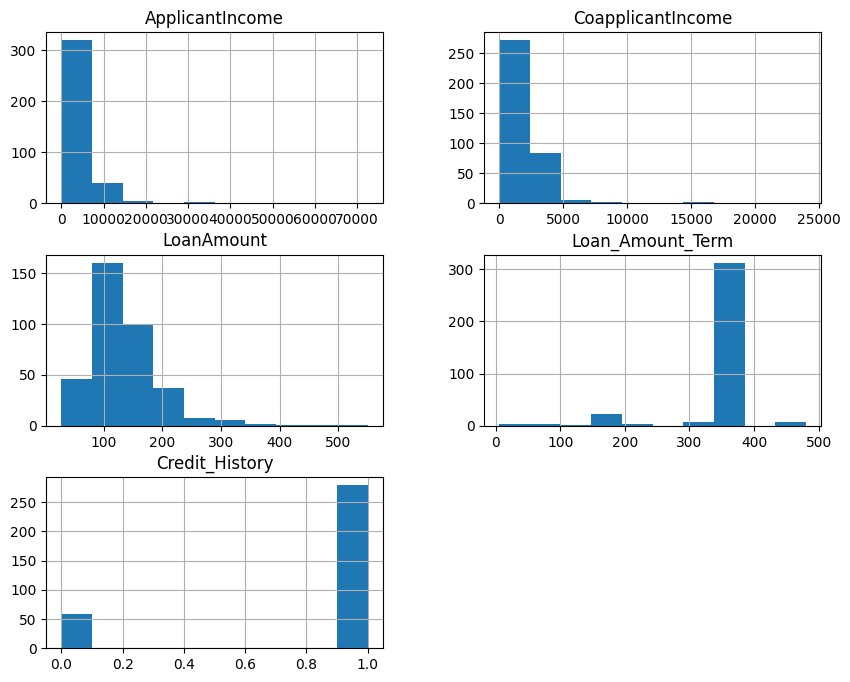

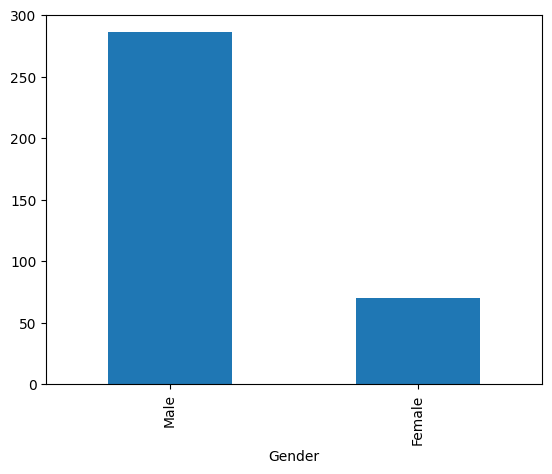

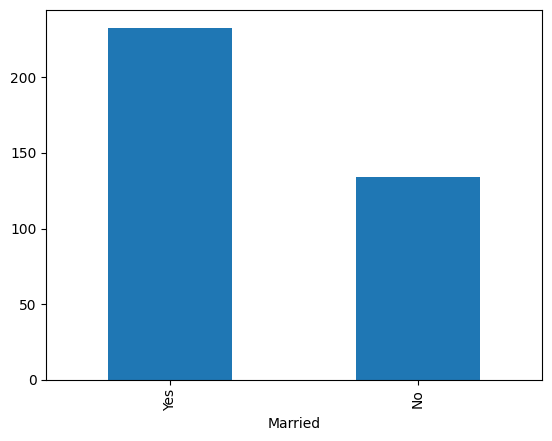

ValueError: could not convert string to float: 'LP001015'

In [4]:
# perform univariate analysis

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Numerical variables
loan_data.hist(bins=10, figsize=(10, 8))
plt.show()

# Categorical variables
loan_data['Gender'].value_counts().plot(kind='bar')
plt.show()
loan_data['Married'].value_counts().plot(kind='bar')
plt.show()

# Correlation analysis
corr_matrix = loan_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


 The histograms show that the dataset contains a mix of skewed and bimodal distributions. The skewness in income and loan amount indicates the presence of outliers or a wide range of values. The loan term distribution suggests standardization in loan durations, while the credit history distribution highlights distinct groups based on creditworthiness. Understanding these distributions is crucial for making informed decisions in loan processing and risk assessment.

Now let's try to identify outliers.

In [7]:
# prompt: spot and interpret any outliers

# Identify numerical columns
numerical_columns = loan_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate z-scores for each numerical column
z_scores = loan_data[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Define outlier threshold
outlier_threshold = 3

# Find outlier indices
outlier_indices = []
for i, row in loan_data.iterrows():
  for column in numerical_columns:
    if abs(z_scores.loc[i, column]) > outlier_threshold:
      outlier_indices.append(i)
      break

# Interpret outliers
outliers = loan_data.loc[outlier_indices]
print(f"Number of outliers: {len(outliers)}")
print(outliers)



Number of outliers: 20
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
25   LP001153    Male      No          0      Graduate            No   
72   LP001375    Male     Yes          1      Graduate           NaN   
81   LP001428    Male     Yes         3+      Graduate            No   
91   LP001483    Male     Yes         3+      Graduate            No   
134  LP001737    Male      No          0      Graduate            No   
143  LP001791    Male     Yes          0      Graduate           Yes   
144  LP001794    Male     Yes          2      Graduate           Yes   
189  LP002059    Male     Yes          2      Graduate            No   
190  LP002062  Female     Yes          1      Graduate            No   
194  LP002077    Male     Yes          1      Graduate            No   
216  LP002186    Male     Yes          0  Not Graduate            No   
230  LP002294    Male      No          0      Graduate            No   
237  LP002325    Male     Yes          2 

In [10]:
# prompt: Perform an outlier treatment

# Option 1: Remove outliers
loan_data_without_outliers = loan_data.drop(outlier_indices)

# Option 2: Replace outliers with mean or median
for i, row in outliers.iterrows():
  for column in numerical_columns:
    if abs(z_scores.loc[i, column]) > outlier_threshold:
      loan_data.loc[i, column] = loan_data[column].mean()

# Further analysis with the cleaned dataset can be done here


Now let's do outlier treatment.

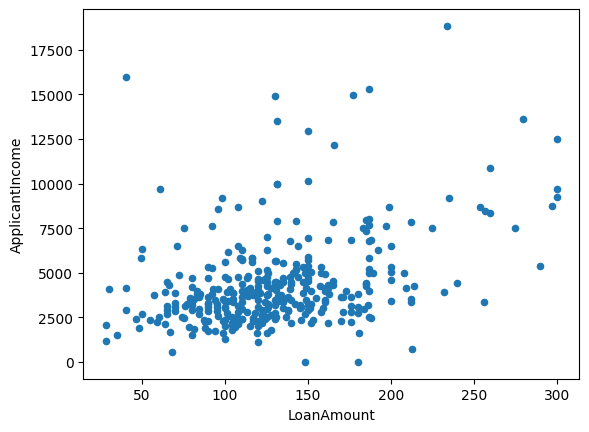

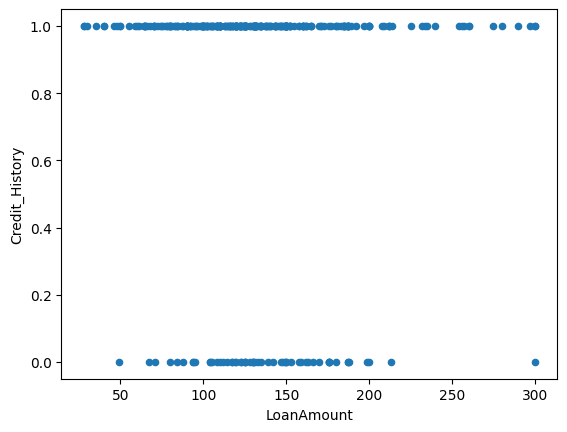

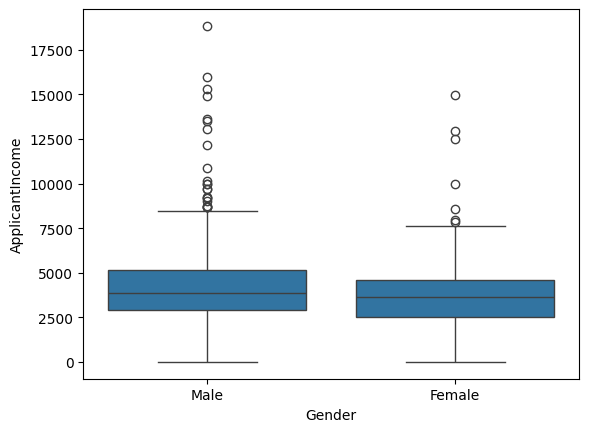

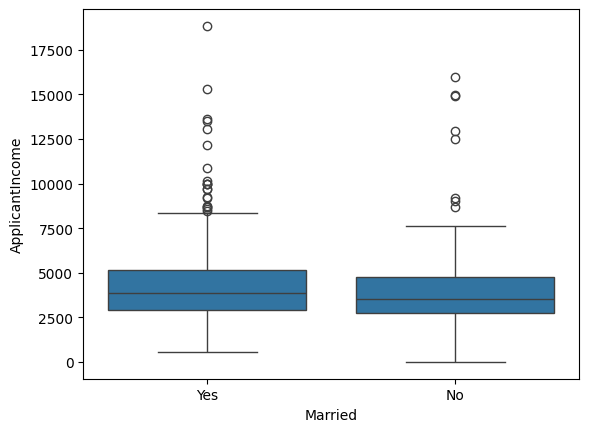

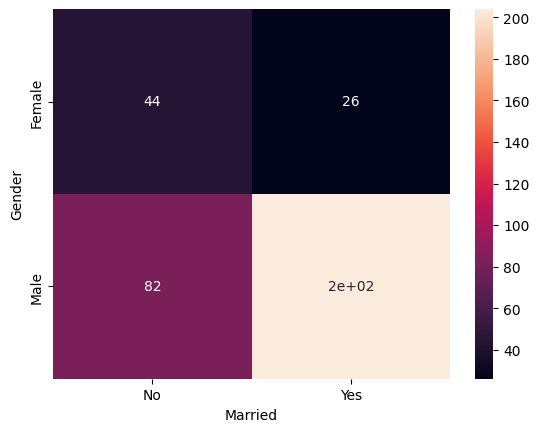

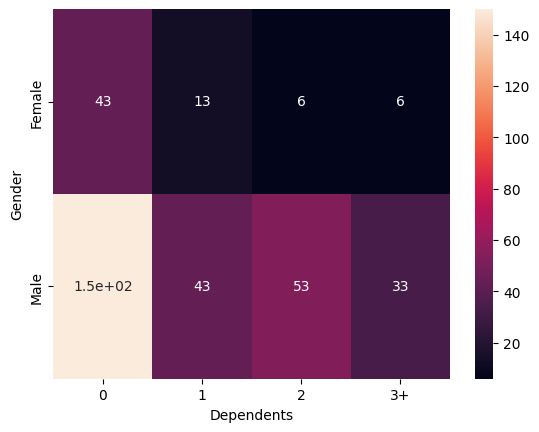

In [11]:
# prompt: Perform bivariate analysis to study the strength of the correlation among variables

# Numerical-numerical correlation
loan_data.plot.scatter(x="LoanAmount", y="ApplicantIncome")
plt.show()
loan_data.plot.scatter(x="LoanAmount", y="Credit_History")
plt.show()

# Categorical-numerical correlation
sns.boxplot(x="Gender", y="Applicant Income", data=loan_data)
plt.show()
sns.boxplot(x="Married", y="Applicant Income", data=loan_data)
plt.show()

# Categorical-categorical correlation
crosstab = pd.crosstab(loan_data["Gender"], loan_data["Married"])
sns.heatmap(crosstab, annot=True)
plt.show()
crosstab = pd.crosstab(loan_data["Gender"], loan_data["Dependents"])
sns.heatmap(crosstab, annot=True)
plt.show()
